In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [3]:
pyber_data = pd.merge(ride_data, city_data, how="left", on=["city"])
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


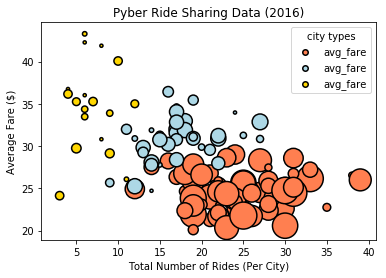

In [4]:
#Bubble Plot of Ride Sharing Data

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

pyber_data_rural = pyber_data.loc[(pyber_data["type"] == "Rural")]
pyber_data_rural_avg_fare = pyber_data_rural.groupby("city").mean()["fare"]
pyber_data_rural_avg_fare = pd.DataFrame(pyber_data_rural_avg_fare)

pyber_data_rural_rides = pyber_data_rural['city'].value_counts()
pyber_data_rural_rides = pd.DataFrame(pyber_data_rural_rides)
pyber_data_rural_rides.index.name = 'city'
pyber_data_rural_rides.rename(columns={'city' : 'ride_count'}, inplace=True)

pyber_data_rural_drivers = city_data.loc[(city_data["type"] == "Rural")].set_index("city").iloc[:,0]
pyber_data_rural_drivers = pd.DataFrame(pyber_data_rural_drivers)


clean_pyber_data_rural = pd.merge(pyber_data_rural_avg_fare, pyber_data_rural_rides, how='outer', left_index=True, right_index=True)

clean_pyber_data_rural = pd.merge(clean_pyber_data_rural, pyber_data_rural_drivers, how='outer', left_index=True, right_index=True)
clean_pyber_data_rural.rename(columns={'fare' : 'avg_fare'}, inplace=True)
#clean_pyber_data_rural.head()

pyber_data_urban = pyber_data.loc[(pyber_data["type"] == "Urban")]
#pyber_data_urban.head()


pyber_data_urban_avg_fare  = pyber_data_urban.groupby("city").mean()["fare"]
pyber_data_urban_avg_fare = pd.DataFrame(pyber_data_urban_avg_fare)
pyber_data_urban_rides = pyber_data_urban['city'].value_counts()
pyber_data_urban_rides = pd.DataFrame(pyber_data_urban_rides)
pyber_data_urban_rides.index.name = 'city'
pyber_data_urban_rides.rename(columns={'city' : 'ride_count'}, inplace=True)
pyber_data_urban_drivers = city_data.loc[(city_data["type"] == "Urban")].set_index("city").iloc[:,0]
pyber_data_urban_drivers = pd.DataFrame(pyber_data_urban_drivers)


clean_pyber_data_urban  = pd.merge(pyber_data_urban_avg_fare, pyber_data_urban_rides, how='outer', left_index=True, right_index=True)
clean_pyber_data_urban = pd.merge(clean_pyber_data_urban, pyber_data_urban_drivers, how='outer', left_index=True, right_index=True)
clean_pyber_data_urban.rename(columns={'fare' : 'avg_fare'}, inplace=True)
#clean_pyber_data_urban.head()


pyber_data_suburban = pyber_data.loc[(pyber_data["type"] == "Suburban")]
pyber_data_suburban.head()
pyber_data_suburban_avg_fare = pyber_data_suburban.groupby("city").mean()["fare"]
pyber_data_suburban_avg_fare = pd.DataFrame(pyber_data_suburban_avg_fare)
pyber_data_suburban_rides = pyber_data_suburban['city'].value_counts()
pyber_data_suburban_rides = pd.DataFrame(pyber_data_suburban_rides)
pyber_data_suburban_rides.index.name = 'city'
pyber_data_suburban_rides.rename(columns={'city' : 'ride_count'}, inplace=True)
pyber_data_suburban_drivers = city_data.loc[(city_data["type"] == "Suburban")].set_index("city").iloc[:,0]
pyber_data_suburban_drivers = pd.DataFrame(pyber_data_suburban_drivers)
clean_pyber_data_suburban = pd.merge(pyber_data_suburban_avg_fare, pyber_data_suburban_rides, how='outer', left_index=True, right_index=True)
clean_pyber_data_suburban = pd.merge(clean_pyber_data_suburban, pyber_data_suburban_drivers, how='outer', left_index=True, right_index=True)
clean_pyber_data_suburban.rename(columns={'fare' : 'avg_fare'}, inplace=True)
#clean_pyber_data_suburban.head()


x_rural =  clean_pyber_data_rural ['ride_count']
x_urban = clean_pyber_data_urban['ride_count']
x_suburban = clean_pyber_data_suburban['ride_count']

y_rural = clean_pyber_data_rural['avg_fare']
y_urban = clean_pyber_data_urban['avg_fare']
y_suburban = clean_pyber_data_suburban['avg_fare']

s_rural = clean_pyber_data_rural['driver_count']
s_urban = clean_pyber_data_urban['driver_count']
s_suburban = clean_pyber_data_suburban['driver_count']

urban = plt.scatter(x_urban, y_urban, s_urban*10, c='coral', linewidths=1.5, edgecolors="black")
suburban = plt.scatter(x_suburban, y_suburban, s_suburban*10, c='lightblue', linewidths=1.5, edgecolors="black")
rural = plt.scatter(x_rural, y_rural, s_rural*10, c='gold', linewidths=1.5, edgecolors="black")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend((rural, urban, suburban), 
           ('Urban','Rural','Suburban'),
           title = "City Type")

# add and format legend
lgnd = plt.legend(handles=[urban,suburban,rural], loc ='best',title = 'city types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

sns.set
plt.show()

In [5]:
#Total Fares by City Type

total_fares = pyber_data.groupby(['type']).sum()['fare'] 
total_fares = pd.DataFrame(total_fares)

In [6]:
total_fares_urban = total_fares.iloc[2]
total_fares_suburban = total_fares.iloc[1]
total_fares_rural = total_fares.iloc[0]

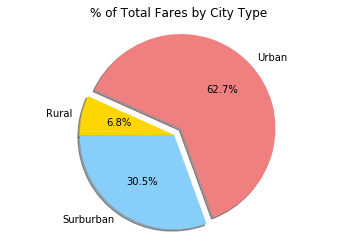

In [7]:
total_fares_pie_labels = ["Urban", "Rural", "Surburban", ]
total_fares_pie_sizes = [total_fares_urban, total_fares_rural, total_fares_suburban,]
total_fares_pie_colors = ["lightcoral", "gold", "lightskyblue"]
total_fares_pie_explode = (0.1, 0, 0)
plt.pie(total_fares_pie_sizes, 
        explode=total_fares_pie_explode, 
        labels=total_fares_pie_labels, 
        colors=total_fares_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=290)
plt.axis("equal")
plt.title('% of Total Fares by City Type')
plt.show()

In [8]:
#Total Rides by City Type

In [9]:
total_rides = pyber_data.groupby("type").size().to_frame(name='total_rides')
#total_rides
total_rides_urban = total_rides.iloc[2]
total_rides_suburban = total_rides.iloc[1]
total_rides_rural = total_rides.iloc[0]

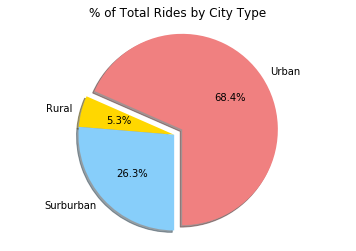

In [10]:
total_rides_pie_labels = ["Urban", "Rural", "Surburban"]
total_rides_pie_sizes = [total_rides_urban, total_rides_rural, total_rides_suburban,]
total_rides_pie_colors = ["lightcoral", "gold", "lightskyblue"]
total_rides_pie_explode = (0.1, 0, 0)
plt.pie(total_rides_pie_sizes, 
        explode=total_rides_pie_explode, 
        labels=total_rides_pie_labels, 
        colors=total_rides_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.show()

In [11]:
#Total Drivers by City Type

In [12]:
total_drivers = pyber_data.groupby('type').sum()['driver_count']
total_drivers = pd.DataFrame(total_drivers)

In [13]:
total_drivers_urban = (city_data.loc[city_data["type"] == "Urban"]).sum()["driver_count"]
total_drivers_suburban = (city_data.loc[city_data["type"] == "Suburban"]).sum()["driver_count"]
total_drivers_rural = (city_data.loc[city_data["type"] == "Rural"]).sum()["driver_count"]

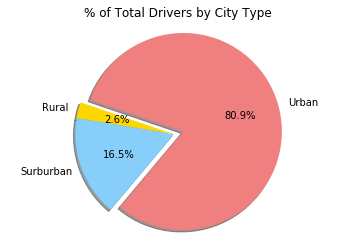

In [14]:
total_drivers_pie_labels = ["Urban", "Rural", "Surburban",]
total_drivers_pie_sizes = [total_drivers_urban, total_drivers_rural, total_drivers_suburban ]
total_drivers_pie_colors = ["lightcoral", "gold", "lightskyblue"]
total_drivers_pie_explode = (0.1, 0, 0)
plt.pie(total_drivers_pie_sizes, 
        explode=total_drivers_pie_explode, 
        labels=total_drivers_pie_labels, 
        colors=total_drivers_pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')
plt.show()